# Time Series Forecasting in Python

**Data Science With Raghav**

In this video we will use Time Series forecasting methods in Python to forecast for two sample problems
1. Bitcoin Price Prediction
2. YouTube Subscriber Growth

We will use some below basic methods for modelling
1. Random Walk Forecast with Drift
2. ARIMA (Auto Regressive Integrated Moving Average)

Data Needed:-
1. Bitcoin Hourly Price data for past one year
2. Youtube daily subscriber change data for past one year

In [1]:
import datetime
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read the data file 

In [2]:
ytsubs_df = pd.read_csv('Totals.csv')
print(ytsubs_df.shape)

(365, 2)


In [3]:
ytsubs_df.head()

,Date,Subscribers
0,2020-01-04,0
1,2020-01-05,0
2,2020-01-06,0
3,2020-01-07,0
4,2020-01-08,0


In [4]:
ytsubs_df.iloc[0,1] = 12

In [5]:
ytsubs_df.head()

,Date,Subscribers
0,2020-01-04,12
1,2020-01-05,0
2,2020-01-06,0
3,2020-01-07,0
4,2020-01-08,0


In [6]:
ytsubs_df['TotalSubscribers'] = ytsubs_df['Subscribers'].cumsum()

In [7]:
ytsubs_df.tail()

,Date,Subscribers,TotalSubscribers
360,2020-12-29,2,216
361,2020-12-30,0,216
362,2020-12-31,2,218
363,2021-01-01,0,218
364,2021-01-02,1,219


## Plot

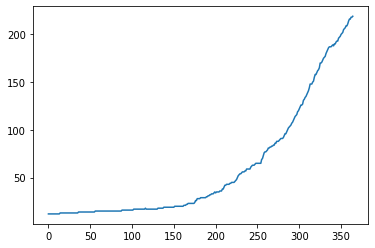

In [8]:
plt.plot(ytsubs_df['TotalSubscribers'])

## Naive with drift

In [9]:
219 + (30*(219-12)/(365-1))

236.06043956043956

In [10]:
y_T = ytsubs_df['TotalSubscribers'].iloc[-1]
y_T

219

In [11]:
y_1 = ytsubs_df['TotalSubscribers'].iloc[1]
y_1

12

In [12]:
T = ytsubs_df['TotalSubscribers'].shape[0]
T

365

In [13]:
def forecast_with_Rwf(df,col,h):
    y_T = df[col].iloc[-1]
    y_1 = df[col].iloc[1]
    T = df[col].shape[0]
    forecast = []
    for h in range(1,31):
        val = y_T + (h*(y_T-y_1)/(T-1))
        forecast.append(int(val))
    return forecast

In [14]:
fcast_rwf = forecast_with_Rwf(ytsubs_df,'TotalSubscribers',30)

**generate date range**

In [15]:
#generate date range
def generate_date_range(start_date,numdays=30,fmt='%Y-%m-%d',direction='forward'):
    """
    Input:
        start_date: starting date from which to create the date range format expected YYYY-MM-DD
        direction: forward or backward
    """
    base = datetime.datetime.strptime(start_date,'%Y-%m-%d')    
    if direction=='forward':
        date_list = [(base + datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(numdays)]
    elif direction=='backward':#reverese date range
        date_list = [(base - datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(numdays)]
    else:
        print('direction value should be either "forward" or "backward"')
        return None
    return date_list
        

In [16]:
pd.DataFrame({'Date':generate_date_range('2021-01-02'),
              'TotalSubscribers':fcast_rwf})

,Date,TotalSubscribers
0,2021-01-02,219
1,2021-01-03,220
2,2021-01-04,220
3,2021-01-05,221
4,2021-01-06,221
5,2021-01-07,222
6,2021-01-08,222
7,2021-01-09,223
8,2021-01-10,224
9,2021-01-11,224
